# **Formação Cientista de Dados**
## Decomposição de série temporal

In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
"""
Carregamento da base de dados, conversão do atributo para data e criação da
série temporal (ts)
"""
base = pd.read_csv('./Data/AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv(
    './Data/AirPassengers.csv', parse_dates=['Month'],index_col='Month', 
    date_format=dateparse
)
ts = base['#Passengers']
ts

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: #Passengers, Length: 144, dtype: int64

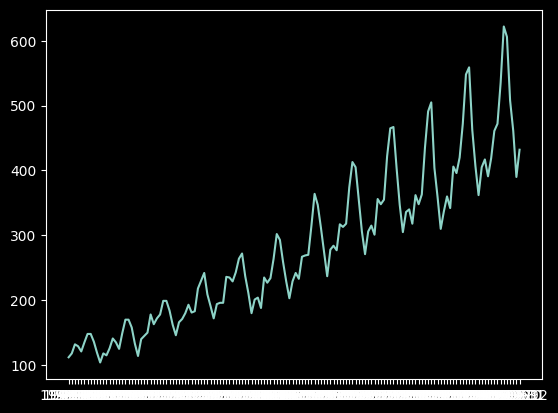

In [3]:
# Visualização da série temporal
plt.plot(ts);

In [4]:
# Decomposição da série temporal, criando uma variável para cada formato
decomposicao = seasonal_decompose(ts,  period=12)

In [5]:
# Tendencia
tendencia = decomposicao.trend
tendencia

Month
1949-01   NaN
1949-02   NaN
1949-03   NaN
1949-04   NaN
1949-05   NaN
           ..
1960-08   NaN
1960-09   NaN
1960-10   NaN
1960-11   NaN
1960-12   NaN
Name: trend, Length: 144, dtype: float64

In [6]:
# Sazonalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01   -24.748737
1949-02   -36.188131
1949-03    -2.241162
1949-04    -8.036616
1949-05    -4.506313
             ...    
1960-08    62.823232
1960-09    16.520202
1960-10   -20.642677
1960-11   -53.593434
1960-12   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [7]:
# Erro
aleatorio = decomposicao.resid
aleatorio

Month
1949-01   NaN
1949-02   NaN
1949-03   NaN
1949-04   NaN
1949-05   NaN
           ..
1960-08   NaN
1960-09   NaN
1960-10   NaN
1960-11   NaN
1960-12   NaN
Name: resid, Length: 144, dtype: float64

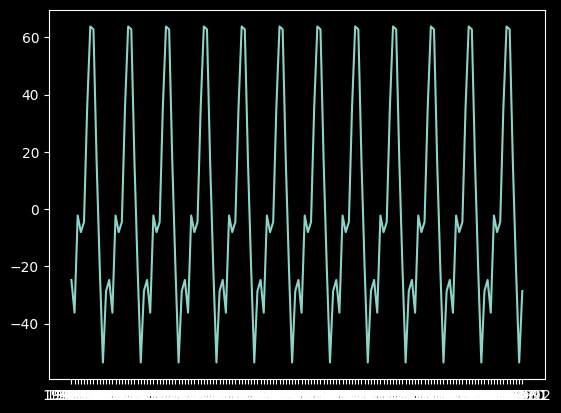

In [8]:
# Visualização de gráfico para cada formato da série temporal
# Sazonal
plt.plot(sazonal);

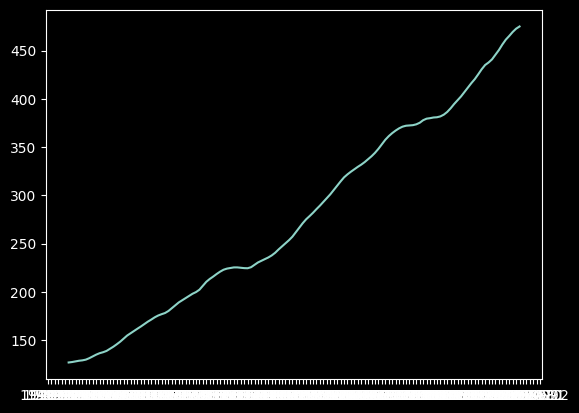

In [9]:
# Tendencia
plt.plot(tendencia);

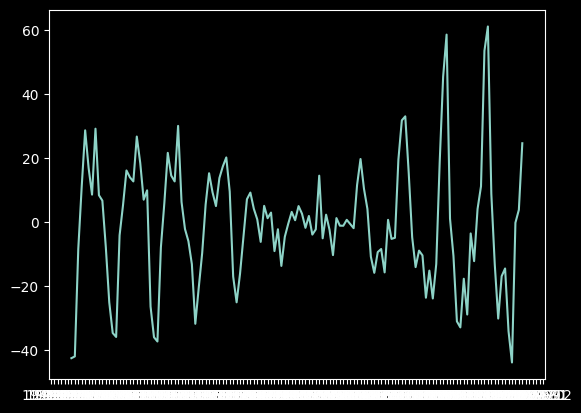

In [10]:
# Aleatório
plt.plot(aleatorio);

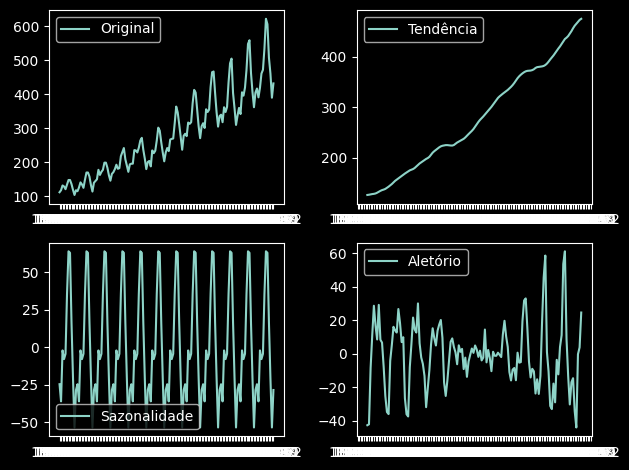

In [11]:
# Visualizando todos os gráficos 
plt.subplot(2,2,1)
plt.plot(ts, label='Original')
plt.legend(loc='best')

# Visualização somente da tendência
plt.subplot(2,2,2)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='best')

# Visualização somente da sazonalidade
plt.subplot(2,2,3)
plt.plot(sazonal, label='Sazonalidade')
plt.legend(loc='best')

# Visualização somente do elemento aleatório
plt.subplot(2,2,4)
plt.plot(aleatorio, label='Aletório')
plt.legend(loc='best')
plt.tight_layout();